In [ ]:
def countFreq(arr, n):  
    mp = {}  
    for i in range(n): 
        if arr[i] not in mp: 
            mp[arr[i]] = 0
        mp[arr[i]] += 1
    for i in range(n): 
        if (mp[arr[i]] != -1): 
            print(arr[i],mp[arr[i]]) 
        mp[arr[i]] = -1  
        
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn import preprocessing 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

min_max_scaler_x = preprocessing.StandardScaler()#MinMaxScaler(feature_range =(0, 1)) 
min_max_scaler_x.fit(X)

min_max_scaler = preprocessing.StandardScaler()#MinMaxScaler(feature_range =(0, 1)) 
X = min_max_scaler.fit_transform(X) 

le = LabelEncoder()
Y= le.fit_transform(y)

#strategy = {0:2500, 1:2500, 2:2500}
#oversample = SMOTE(sampling_strategy=strategy)
#X, Y = oversample.fit_resample(X, Y)

arr=Y
n = len(arr) 
countFreq(arr, n) 

In [ ]:
'''X11=X.reshape([3798,58800])
X11=pd.DataFrame(data=X11)
X11.head()
X11.to_csv('Img_arr.csv')'''

In [ ]:
#link=pd.read_csv('link_to_img_trial.csv')
#gene_matrix=pd.read_csv('gene_exp.csv')
#gene_matrix = gene_matrix[['bar_name','x','y']]
#gene_matrix=gene_matrix.drop_duplicates(subset ="bar_name", keep = 'first') 
Barcode_img_name = pd.merge(gene_matrix,link,on=['x','y'],how='inner')
Barcode_img_name = Barcode_img_name[['bar_name','Sno', 'x', 'y']]
Barcode_img_name.to_csv('Barcode_img_name.csv')
Barcode_img_name.head()
#gene_matrix.head()

In [ ]:
from scipy import stats
import seaborn as sns
#y1=y[y>0]
#normalized_data = stats.boxcox(y1)
fig, ax=plt.subplots(1,2)
sns.distplot(y1, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(y, ax=ax[1])
ax[1].set_title("Normalized data")

In [ ]:
from scipy import stats
import seaborn as sns
normalized_data=y[y<10]
fig, ax=plt.subplots(1,2)
sns.distplot(y, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data, ax=ax[1])
ax[1].set_title("Normalized data")

In [ ]:
df=pd.read_csv('gene_exp_breast_can2.csv')
df=df.drop(['Unnamed: 0','X1','X2','bar_name'],axis=1)
df2=pd.DataFrame()
df2=df.groupby(['x','y','UMI_Count']).agg('gene_name').apply(lambda x:" ".join(list(set(x)))).reset_index()
df3=pd.read_csv('link_to_img_breast_can2.csv')
df7=df3
df7.head()

In [ ]:
df11 = pd.merge(df, df7, on=['x','y'], how='inner')
df11=df11.drop(columns=['Unnamed: 0'])
df11.head()

In [ ]:
from numpy import load
df12=pd.pivot_table(df11, values='UMI_Count', index=['Sno'],columns=['gene_name'], aggfunc=np.sum)
df13=df12.fillna(0)
intersect_col_genes= load('intersect_col_genes.npy',allow_pickle=True)
df13=df13[intersect_col_genes]
df13.head()
df13.to_csv('Pivot_gene_breast_can2.csv')

In [101]:
train_Y=pd.read_csv('train_Y.csv')
pivot=pd.read_csv('link_to_img_trial.csv')
pivot=pivot[['x','y','Sno']]
pivot_trial_Y=pd.merge(train_Y,pivot,on=['Sno'],how="inner")
#pivot.head()
pivot_trial_Y.head()
pivot_trial_Y.to_csv('pivot_trial_Y.csv')

In [110]:
Gene_exp_test = pd.read_csv('gene_exp_breast_can2.csv')
Gene_exp_test = Gene_exp_test[['x','y','bar_name']]
Gene_exp_test.drop_duplicates(subset=['bar_name'],inplace=True)
pivot=pd.read_csv('link_to_img_breast_can2.csv')
pivot=pivot[['x','y','Sno']]
Barcode_img_name_test=pd.merge(pivot,Gene_exp_test,on=["x","y"],how="inner")
Barcode_img_name_test.to_csv('Barcode_img_name_test.csv')

In [112]:
test_Y=pd.read_csv('test_Y.csv')
pivot=pd.read_csv('Barcode_img_name_test.csv')
pivot=pivot[['x','y','Sno','Barcode']]
pivot_test_Y=pd.merge(test_Y,pivot,on=['Barcode'],how="inner")
#pivot.head()
pivot_test_Y.head()
pivot_test_Y.to_csv('pivot_test_Y.csv')

## Import Data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import sys
from numpy import load
from matplotlib import pyplot as plt
plt.style.use("ggplot")
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import preprocessing 
from numpy import log
df14=pd.read_csv('Pivot_gene_trial.csv')
#df14.reset_index(level=0, inplace=True)
Sno=df14['Sno']
df14.drop(['Sno'],axis=1,inplace=True)
#df14=log(df14+1)
min_max_scaler = preprocessing.StandardScaler()#MinMaxScaler(feature_range =(0, 1))
min_max_scaler_y = preprocessing.StandardScaler()#MinMaxScaler(feature_range =(0, 1)) 
min_max_scaler_y.fit(df14)
df14 = min_max_scaler.fit_transform(df14) 
df14=pd.DataFrame(data=df14)
df14=df14.apply(lambda x: pd.qcut(x, 3,duplicates='drop',labels=False))
df14=df14.astype('str')
df14=df14.replace(['0', '1', '2'], ['A','B', 'C'])
#df14=df14.iloc[:,382:383]
df14.head()
#CNN_train_reg = pd.DataFrame()
#CNN_train_reg['Gene'] = df14['MALAT1.1']
#CNN_train_reg['Sno'] = Sno

In [ ]:
'''import pandas as pd
#CNN_train_reg= pd.read_csv('CNN_train_reg.csv')
def append_ext(fn):
    return fn+".tif"
CNN_train_reg["Sno"]=CNN_train_reg["Sno"].apply(append_ext)
CNN_train_reg.to_csv('CNN_train_reg.csv')'''

In [ ]:
y=df14.iloc[:,382:383]
y

In [2]:
# create a mapping of tags to integers given the loaded mapping file
def create_tag_mapping(df3):
    # create a set of all known tags
    labels = set()
    for i in range(len(df3)):
        # convert spaced separated tags into an array of tags
        gene_name = df3['gene_name'][i].split(' ')
        # add tags to the set of known labels
        labels.update(gene_name)
    # convert set of labels to a list to list
    labels = list(labels)
    # order set alphabetically
    labels.sort()
    # dict that maps labels to integers, and the reverse
    labels_map = {labels[i]:i for i in range(len(labels))}
    inv_labels_map = {i:labels[i] for i in range(len(labels))}
    return labels_map, inv_labels_map
# create a mapping of filename to tags
def create_file_mapping(df3):
    mapping = dict()
    for i in range(len(df3)):
        name, gene_name = df3['Sno'][i], df3['gene_name'][i]
        mapping[name] = gene_name.split(' ')
    return mapping
# create a one hot encoding for one list of tags
def one_hot_encode(gene_name, mapping):
    # create empty vector
    encoding = zeros(len(mapping), dtype='uint8')
    # mark 1 for each tag in the vector
    for tag in gene_name:
        encoding[mapping[tag]] = 1
    return encoding
def load_dataset(path, file_mapping, tag_mapping):
    photos, targets = list(), list()
    # enumerate files in the directory
    for filename in listdir(folder):
        # load image
        photo = load_img(path + filename, target_size=(140,140))
        # convert to numpy array
        photo = img_to_array(photo, dtype='uint8')
        # get tags
        gene_name = file_mapping[filename[:-4]]
        # one hot encode tags
        target = one_hot_encode(gene_name, tag_mapping)
        # store
        photos.append(photo)
        targets.append(target)
    X = asarray(photos, dtype='uint8')
    return X

In [3]:
from os import listdir
from numpy import zeros
from numpy import asarray
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
df5=pd.read_csv('Gene_list_df5.csv')
df5=df5.drop(columns=['Unnamed: 0'])
mapping_csv = df5
# create a mapping of tags to integers
tag_mapping, _ = create_tag_mapping(mapping_csv)
# create a mapping of filenames to tag lists
file_mapping = create_file_mapping(mapping_csv)
folder = 'C:/Users/Onkar/UntitledFolder/Trainimg_breast2/'
X= load_dataset(folder, file_mapping, tag_mapping)
X=X.reshape([3798,58800]) #(3407,140,140,3) --> reshape --> (3407,58800), #Umap->DR #CNN/CapsNet
#y=df13.iloc[:,0:5].values
#y=y.astype(int)
print(X.shape)

(3798, 58800)


## LGBM Classifier

In [69]:
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X=pd.read_csv('train_X.csv')
X=X.iloc[:,1:]
Standard_scaler_x = preprocessing.MinMaxScaler(feature_range =(0, 1)) #StandardScaler()#
Standard_scaler_x.fit(X)
Standard_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) #StandardScaler()#
X = Standard_scaler.fit_transform(X) 

Y=pd.read_csv('train_Y.csv')
Y=Y.iloc[:,2:3]
Standard_scaler_y = preprocessing.MinMaxScaler(feature_range =(0, 1)) #StandardScaler()#
Standard_scaler_y.fit(Y)
Standard_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) #StandardScaler()#
Y = Standard_scaler.fit_transform(Y) 
Y = pd.DataFrame(data=Y)
Y=Y.apply(lambda x: pd.qcut(x, 3,duplicates='drop',labels=False))


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 0)

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

C:\Users\Onkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## Validation Set

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr",average='macro')
print('Roc-auc score:',roc_auc)
print("F1-score",f1_score(y_test, y_pred, average='macro'))
print("Precision",precision_score(y_test, y_pred, average='macro'))
print("Recall",recall_score(y_test, y_pred, average='macro'))
print("Accuracy",accuracy_score(y_test, y_pred))

Confusion matrix

 [[152  40  24]
 [ 46  62  61]
 [  7  33 145]]
Roc-auc score: 0.8063014088673549
F1-score 0.6095933929492191
Precision 0.6103858188340338
Recall 0.6181171309376438
Accuracy 0.6298245614035087


In [125]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(truth, pred, average="macro"):

    lb = LabelBinarizer()
    lb.fit(truth)

    truth = lb.transform(truth)
    pred = lb.transform(pred)

    return roc_auc_score(truth, pred, average=average)
multiclass_roc_auc_score(y_pred, y_test, average="weighted")

0.7305167319643966

## Visualisation

In [102]:
pivot_trial_y=pd.read_csv('pivot_trial_y.csv')
pivot_trial_y.head()

,Unnamed: 0,Unnamed: 0.1,Barcode,ABCC5,ADAM15,ADAR,ADIPOR1,AEBP1,ANXA2,ANXA6,...,COX6C,CPB1.1,KRT5,MALAT1.1,CASP8,CASP10,MAD2L2,Sno,x,y
0,0,0,AAACAAGTATCTCCCA-1,2,0,4,1,9,2,2,...,35,2,0,51,2,0,1,2552img,15937,17428
1,1,1,AAACACCAATAACTGC-1,31,12,29,11,12,7,9,...,211,7,0,32,1,1,1,2931img,18054,6092
2,2,2,AAACAGAGCGACTCCT-1,0,0,0,1,4,1,1,...,25,1,0,43,0,0,1,0633img,7383,16351
3,3,3,AAACAGGGTCTATATT-1,0,2,7,3,5,4,3,...,55,5,0,47,1,0,2,2368img,15202,5278
4,4,4,AAACAGTGTTCCTGGG-1,15,9,23,11,23,21,5,...,253,8,0,27,1,0,1,3694img,21386,9363


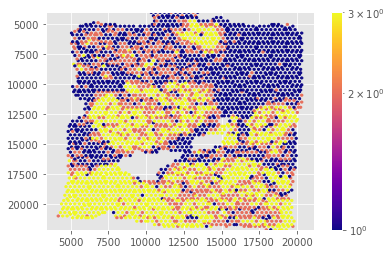

In [103]:
from matplotlib import cm as cm
x = pivot_trial_y['x']
y = pivot_trial_y['y']
c = Y
plt.hexbin(y,x, C=c, cmap=cm.plasma, gridsize=110,bins='log')
plt.ylim(max(x), min(x)) 
plt.colorbar()

plt.show() 

## Breast Cancer Section 2A

In [85]:
test_X = pd.read_csv('test_X.csv')
test_X=test_X.iloc[:,1:]
test_X=Standard_scaler_x.fit_transform(test_X)

test_Y=pd.read_csv('test_Y.csv')
test_Y=test_Y.iloc[:,1:2]
#test_Y=Standard_scaler_y.fit_transform(test_Y)
test_Y=pd.DataFrame(data=test_Y)
test_Y=test_Y.apply(lambda x: pd.qcut(x, 3,duplicates='drop',labels=False))

y_pred_test=clf.predict(test_X)

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
cm = confusion_matrix(test_Y, y_pred_test)
print('Confusion matrix\n\n', cm)
roc_auc = roc_auc_score(test_Y, clf.predict_proba(test_X), multi_class="ovr",average='macro')
print('Roc-auc score:',roc_auc)
print("F1-score",f1_score(test_Y, y_pred_test, average='macro'))
print("Precision",precision_score(test_Y, y_pred_test, average='macro'))
print("Recall",recall_score(test_Y, y_pred_test, average='macro'))
print("Accuracy",accuracy_score(test_Y, y_pred_test))

Confusion matrix

 [[803 302 444]
 [337 246 669]
 [ 81 144 961]]
Roc-auc score: 0.6900511801966754
F1-score 0.4741467884673769
Precision 0.49216827375812006
Recall 0.5083904226625551
Accuracy 0.5041384499623778


In [126]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(truth, pred, average="macro"):

    lb = LabelBinarizer()
    lb.fit(truth)

    truth = lb.transform(truth)
    pred = lb.transform(pred)

    return roc_auc_score(truth, pred, average=average)
multiclass_roc_auc_score(y_pred_test, test_Y, average="weighted")

0.6536845350630107

C:\Users\Onkar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Onkar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

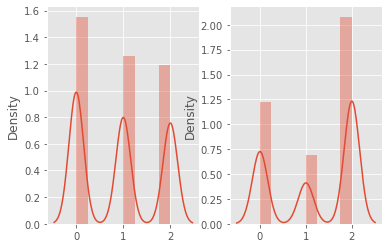

In [89]:
import seaborn as sns
plt.subplot(1,2,1)
sns.distplot(test_Y)
plt.subplot(1,2,2)
sns.distplot(y_pred_test)

C:\Users\Onkar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Onkar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

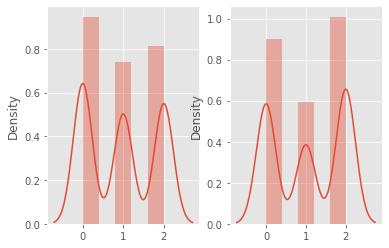

In [90]:
import seaborn as sns
plt.subplot(1,2,1)
sns.distplot(y_test)
plt.subplot(1,2,2)
sns.distplot(y_pred)

## Visualisation

In [113]:
Gene_exp=pd.read_csv('pivot_test_Y.csv')
Gene_exp.head()

,Unnamed: 0,Barcode,ABCC5,ADAM15,ADAR,ADIPOR1,AEBP1,ANXA2,ANXA6,APOC1,...,COX6C,CPB1.1,KRT5,MALAT1.1,CASP8,CASP10,MAD2L2,x,y,Sno
0,0,AAACAACGAATAGTTC-1,5,6,3,4,7,4,8,21,...,238,9,0,21,0,0,1,3722,6080,0003img
1,1,AAACAAGTATCTCCCA-1,2,1,4,2,12,6,7,13,...,66,10,1,20,1,0,0,15632,17782,2758img
2,2,AAACAATCTACTAGCA-1,6,8,13,7,4,2,5,15,...,986,7,1,25,0,0,0,4445,9763,0185img
3,3,AAACACCAATAACTGC-1,12,12,13,5,5,0,3,21,...,143,2,0,17,0,0,0,17734,6447,3169img
4,4,AAACAGAGCGACTCCT-1,6,5,5,2,5,9,1,20,...,77,16,0,6,2,0,0,7079,16716,0823img


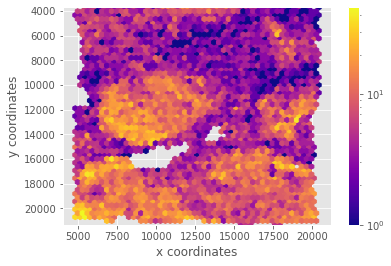

In [114]:
from matplotlib import pyplot as plt
from matplotlib import pylab as pl
from matplotlib import cm as cm
x = Gene_exp['x']
y = Gene_exp['y']
c = Gene_exp['ABCC5']
plt.hexbin(y,x, C=c, cmap=cm.plasma, gridsize=50,bins='log')
plt.xlabel('x coordinates')
plt.ylabel('y coordinates')
plt.ylim(max(x), min(x)) 
plt.colorbar()
plt.show() 

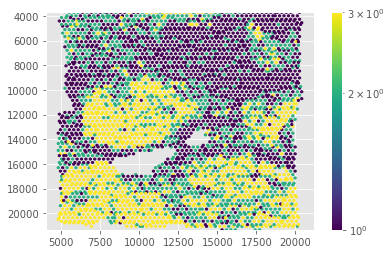

In [124]:
from matplotlib import cm as cm
x = Gene_exp['x']
y = Gene_exp['y']
c = test_Y
plt.hexbin(y,x, C=c, cmap=cm.viridis, gridsize=110,bins='log')
plt.ylim(max(x), min(x)) 
plt.colorbar()
plt.show() 

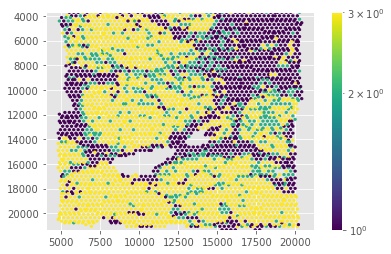

In [121]:
from matplotlib import cm as cm
x1 = Gene_exp['x']
y1 = Gene_exp['y']
c1 = y_pred_test
plt.hexbin(y1,x1, C=c1, cmap=cm.viridis, gridsize=110,bins='log')
plt.ylim(max(x1), min(x1)) 
plt.colorbar()
plt.show()

## Test Set

In [ ]:
'''CNN_test = pd.DataFrame()
CNN_test['Gene'] = df14['MALAT1.1']
CNN_test['Sno'] = Sno
CNN_test.to_csv('CNN_test.csv')'''
from sklearn import preprocessing 
df14=pd.read_csv('Pivot_gene_breast_can2.csv')
#df14.reset_index(level=0, inplace=True)
Sno=df14['Sno']
df14.drop(['Sno'],axis=1,inplace=True)
#df14=log(df14+1)
#df14=min_max_scaler_y.transform(df14)
df14=min_max_scaler_y.fit_transform(df14)
df14=pd.DataFrame(data=df14)
df14=df14.apply(lambda x: pd.qcut(x, 3,duplicates='drop',labels=False))
df14=df14.astype('str')
df14=df14.replace(['0', '1', '2'], ['A', 'B', 'C'])
df14.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
y1=df14.iloc[:,382:383]
le = LabelEncoder()
Y1= le.fit_transform(y1)
Y1

In [ ]:
# create a mapping of tags to integers given the loaded mapping file
def create_tag_mapping(df3):
    # create a set of all known tags
    labels = set()
    for i in range(len(df3)):
        # convert spaced separated tags into an array of tags
        gene_name = df3['gene_name'][i].split(' ')
        # add tags to the set of known labels
        labels.update(gene_name)
    # convert set of labels to a list to list
    labels = list(labels)
    # order set alphabetically
    labels.sort()
    # dict that maps labels to integers, and the reverse
    labels_map = {labels[i]:i for i in range(len(labels))}
    inv_labels_map = {i:labels[i] for i in range(len(labels))}
    return labels_map, inv_labels_map
# create a mapping of filename to tags
def create_file_mapping(df3):
    mapping = dict()
    for i in range(len(df3)):
        name, gene_name = df3['Sno'][i], df3['gene_name'][i]
        mapping[name] = gene_name.split(' ')
    return mapping
# create a one hot encoding for one list of tags
def one_hot_encode(gene_name, mapping):
    # create empty vector
    encoding = zeros(len(mapping), dtype='uint8')
    # mark 1 for each tag in the vector
    for tag in gene_name:
        encoding[mapping[tag]] = 1
    return encoding
def load_dataset(path, file_mapping, tag_mapping):
    photos, targets = list(), list()
    # enumerate files in the directory
    for filename in listdir(folder):
        # load image
        photo = load_img(path + filename, target_size=(140,140))
        # convert to numpy array
        photo = img_to_array(photo, dtype='uint8')
        # get tags
        gene_name = file_mapping[filename[:-4]]
        # one hot encode tags
        target = one_hot_encode(gene_name, tag_mapping)
        # store
        photos.append(photo)
        targets.append(target)
    X = asarray(photos, dtype='uint8')
    return X

from os import listdir
from numpy import zeros
from numpy import asarray
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
df5=pd.read_csv('Gene_list_Breast_Can2.csv')
df5=df5.drop(columns=['Unnamed: 0'])
mapping_csv = df5
# create a mapping of tags to integers
tag_mapping, _ = create_tag_mapping(mapping_csv)
# create a mapping of filenames to tag lists
file_mapping = create_file_mapping(mapping_csv)
folder = 'C:/Users/Onkar/UntitledFolder/Trainimg_breast_test/'
X1= load_dataset(folder, file_mapping, tag_mapping)
X1=X1.reshape([3987,58800]) 

from sklearn import preprocessing 
X1 = min_max_scaler_x.transform(X1) 

In [ ]:
y_pred1=clf.predict(X1)

## Test Set

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

cm = confusion_matrix(Y1, y_pred1)
print('Confusion matrix\n\n', cm)
roc_auc = roc_auc_score(Y1, clf.predict_proba(X1), multi_class="ovr",average='macro')
print('Roc-auc score:',roc_auc)
print("F1-score",f1_score(Y1, y_pred1, average='macro'))
print("Precision",precision_score(Y1, y_pred1, average='macro'))
print("Recall",recall_score(Y1, y_pred1, average='macro'))
print("Accuracy",accuracy_score(Y1, y_pred1))

## Gene Expression Visualisation

## Image

In [ ]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("D:/onkar/Projects/Project_Spt.Transcriptomics/Output_files/block2/V1_Breast_Cancer_Block_A_Section_2_image.tif") 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(image)
#x11=x.iloc[::-1]
#y11=y.iloc[::-1]
plt.hexbin(y11,x11, C=c, cmap=cm.plasma, gridsize=200,bins='log')

## Gene Expression Visualisation Testset

In [ ]:
from matplotlib import cm as cm
x = Gene_exp['x']
y = Gene_exp['y']
c = Gene_exp['AEBP1']
plt.hexbin(y,x, C=c, cmap=cm.plasma, gridsize=100,bins='log')
plt.ylim(max(x), min(x)) 
plt.colorbar()
plt.show() 

## Dimensionality Reduction

## Intersection

In [ ]:
from numpy import savez_compressed
from numpy import asarray
from numpy import save
col_UMI=df13.columns.to_numpy()
col_UMI=asarray(col_UMI)
save('col_UMI.npy', col_UMI)

In [ ]:
from numpy import load
from numpy import asarray
col_Trues = load('col_Trues.npy',allow_pickle=True)
col_UMI=df13.columns.to_numpy()
col_UMI=asarray(col_UMI)
intersect_col_genes=np.intersect1d(col_UMI, col_Trues)
len(intersect_col_genes)

# CNN

In [18]:
import pandas as pd
import keras
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras import optimizers
from keras.models import Model
from keras.layers import Activation, Dense
from keras.applications.vgg16 import VGG16


df=pd.read_csv('CNN_train.csv')
df2=pd.read_csv('CNN_test.csv')
datagen=ImageDataGenerator(rescale=1./255, validation_split=0.25, horizontal_flip=True, vertical_flip=True,featurewise_center=True,rotation_range=90, samplewise_center=True)
train_generator=datagen.flow_from_dataframe(dataframe=df, directory="C:/Users/Onkar/UntitledFolder/Trainimg_breast2/", x_col="Sno", y_col="Gene", subset="training", class_mode="categorical", target_size=(140,140), batch_size=32)
valid_generator=datagen.flow_from_dataframe(dataframe=df, directory="C:/Users/Onkar/UntitledFolder/Trainimg_breast2/", x_col="Sno", y_col="Gene", subset="validation", class_mode="categorical", target_size=(140,140), batch_size=32)
test_generator=datagen.flow_from_dataframe(dataframe=df2, directory="C:/Users/Onkar/UntitledFolder/Trainimg_breast_test/", x_col="Sno", y_col="Gene", class_mode="categorical", target_size=(140,140), batch_size=32)
'''
model = Sequential()
model.add(Conv2D(32, (2, 2), padding='same',input_shape=(140,140,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (2, 2), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (2, 2), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(optimizers.RMSprop(lr=0.0001),
loss="categorical_crossentropy", metrics=["acc"])

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10)
                    
                    
                    model = VGG16(include_top=False, input_shape=(140, 140, 3))
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(3, activation='softmax')(class1)
model = Model(inputs=model.inputs, outputs=output)

model.compile(optimizers.RMSprop(lr=0.0001))

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10)'''



conv_base = tf.keras.applications.ResNet50V2( 
    include_top=False,
    weights='imagenet',
    input_shape=(140,140, 3),
    pooling='avg'
)

for layer in conv_base.layers:
    layer.trainable = False

model = Sequential()
model.add(conv_base)
model.add(Dense(3, activation='softmax'))
model.compile(optimizers.RMSprop(lr=0.0001),
loss="categorical_crossentropy", metrics=["accuracy"])

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10)

Found 2849 validated image filenames belonging to 3 classes.
Found 949 validated image filenames belonging to 3 classes.
Found 3987 validated image filenames belonging to 3 classes.


C:\Users\Onkar\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
89/89 [==============================] - 894s 10s/step - loss: 1.0860 - accuracy: 0.4126 - val_loss: 1.2411 - val_accuracy: 0.3103
Epoch 2/10
 4/89 [>.............................] - ETA: 9:51 - loss: 1.0015 - accuracy: 0.4845

KeyboardInterrupt: 

In [ ]:
df3=pd.read_csv('CNN_test.csv')
test_generator=datagen.flow_from_dataframe(dataframe=df3, directory="C:/Users/Onkar/UntitledFolder/Trainimg_breast_test/", x_col="Sno", y_col="Gene", class_mode="categorical", target_size=(140,140), batch_size=32)
loss, accuracy = model.evaluate(test_generator)

In [4]:
'''import umap.umap_ as umap
umap_data = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=3).fit_transform(df.iloc[:,:-1].values)
plt.figure(figsize=(12,8))
plt.title('Decomposition using UMAP')
plt.scatter(umap_data[:,0], umap_data[:,1])
plt.scatter(umap_data[:,1], umap_data[:,2])
plt.scatter(umap_data[:,2], umap_data[:,0])
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=3, random_state=42).fit_transform(df.iloc[:,:-1].values)
plt.figure(figsize=(12,8))
plt.title('SVD Components')
plt.scatter(svd[:,0], svd[:,1])
plt.scatter(svd[:,1], svd[:,2])
plt.scatter(svd[:,2],svd[:,0])'''
from sklearn.decomposition import PCA
from sklearn import preprocessing 
pca = PCA(.99)
#pca = PCA(n_components=2)
#X=X/255
min_max_scaler = preprocessing.StandardScaler() 
#X = min_max_scaler.fit_transform(X) 
principalComponents = pca.fit(X)
principalC= pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalC)
#principalDf = min_max_scaler.fit_transform(principalDf)
min_max_scaler.fit(principalDf)
#print(pca.explained_variance_ratio_)
principalDf

,0,1,2,3,4,5,6,7,8,9,...,2445,2446,2447,2448,2449,2450,2451,2452,2453,2454
0,-7307.672410,-330.660005,-159.433324,259.091670,36.319259,234.414802,-120.701889,-19.478428,174.112170,-143.949084,...,-19.212768,25.789238,15.310792,23.959509,-23.577037,16.652375,-20.247543,27.427085,53.961646,22.411430
1,-7660.803674,217.162411,-72.216246,194.568814,238.295016,142.647669,-22.630632,-49.970145,-18.529533,12.924309,...,-17.643694,18.597092,1.787164,2.812732,12.107255,-5.044003,2.820464,18.975790,-5.233037,8.837591
2,-7006.683666,-502.063876,251.461562,295.861986,352.041546,-198.729035,-88.907821,-296.785309,253.703948,-431.723308,...,-48.816025,84.183883,-57.010805,7.170799,43.046071,-11.581955,-5.731291,-38.916730,33.472697,73.478300
3,-7301.809110,697.436119,513.929446,340.758923,-418.100274,-40.409964,738.138372,-683.674023,174.647662,-142.631027,...,7.051364,28.712170,47.739544,-8.913340,-8.375176,-1.328667,-39.179610,-11.006461,52.581684,19.100902
4,-1125.346935,-767.356218,-2708.768625,1691.859267,-794.063189,37.735477,-213.615676,387.572415,483.593824,-269.750460,...,35.354629,-36.928056,15.972149,28.948179,-32.425872,-30.934619,-14.261449,23.757403,-15.573948,39.781075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3793,-3898.232767,-1171.488933,-607.454774,68.087010,1824.778972,-666.570895,-289.291966,953.354724,132.200345,-17.178341,...,-0.405543,39.049453,-68.071724,-39.753917,47.946564,-34.488017,9.028088,-53.689274,-4.368772,-20.366868
3794,-2791.549066,582.808032,-1934.527187,-892.665610,584.908779,535.324474,-1066.818639,154.128150,381.375813,-264.676872,...,17.102131,-5.819377,-54.891246,16.936406,16.355426,18.603584,24.647782,19.508210,5.546532,-36.888633
3795,402.621785,-3576.275805,-376.362364,-23.847520,287.659480,28.681085,-508.689271,212.986763,36.608400,691.744755,...,44.751866,14.725760,-31.607753,-0.047035,22.642658,21.537466,-44.457672,-6.168170,17.403991,-9.285393
3796,3204.971250,576.439990,-508.220559,1427.892870,645.629318,148.895980,761.707825,-653.343927,229.123282,-502.352800,...,24.712554,-24.213361,-12.487926,-5.759217,30.415568,-51.939753,13.621568,-18.586401,24.508921,6.424069


In [ ]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.applications import InceptionResNetV2

# load dataset
X = principalDf
Y = pd.read_csv('Pivot_gene_trial.csv')
Y=Y.iloc[:,:1]
#df14=pd.DataFrame(data=Y)
#df14=df14.apply(lambda x: pd.qcut(x, 3,duplicates='drop',labels=False))
#df14=df14.astype('str')
#Y=df14.replace(['0', '1', '2'], ['A','B', 'C'])
#encoder = LabelEncoder()
#encoder.fit(Y)
#encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
def baseline_model():
# create model
    model = InceptionResNetV2(include_top=False, input_shape=(140,140,3))

    model = Sequential()
    model.add(Dense(4800, input_dim=2455, activation='relu'))
    model.add(Dense(3, activation='softmax'))
# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
estimator = KerasClassifier(build_fn=baseline_model, epochs=1, batch_size=5, verbose=1)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean(), results.std()))

## Analysis

## Correlation of Selected Genes

In [ ]:
gene_corr_matrix=Gene_exp[Gene_exp.columns[4:]].corr()
import seaborn as sb
fig, ax = plt.subplots(figsize=(6,6))
sb.heatmap(gene_corr_matrix, vmin = .75, square = True); plt.show()

## No Correlation Between Selected Genes vs Biomarkers

In [ ]:
SLITRK6=Gene_exp[Gene_exp.columns[4:]].corr()['SLITRK6'][:].to_frame()
PGM5=Gene_exp[Gene_exp.columns[4:]].corr()['PGM5'][:].to_frame()
LINC00645=Gene_exp[Gene_exp.columns[4:]].corr()['LINC00645'][:].to_frame()
TTLL12=Gene_exp[Gene_exp.columns[4:]].corr()['TTLL12'][:].to_frame()
COX6C=Gene_exp[Gene_exp.columns[4:]].corr()['COX6C'][:].to_frame()
CPB1=Gene_exp[Gene_exp.columns[4:]].corr()['CPB1'][:].to_frame()
KRT5=Gene_exp[Gene_exp.columns[4:]].corr()['KRT5'][:].to_frame()
MALAT1=Gene_exp[Gene_exp.columns[4:]].corr()['MALAT1'][:].to_frame()
CASP8=Gene_exp[Gene_exp.columns[4:]].corr()['CASP8'][:].to_frame()
CASP10=Gene_exp[Gene_exp.columns[4:]].corr()['CASP10'][:].to_frame()
MAD2L2=Gene_exp[Gene_exp.columns[4:]].corr()['MAD2L2'][:].to_frame()

## Differentially Expressed Genes in 3 different Regions

## Upregulated and Downregulated Genes

## Other Regressor and Classifyier Models

# Gene Expression Models

## SVM

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## Naive Bayes

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## TPOT AutoML

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y= le.fit_transform(y)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
model.fit(principalDf, Y)

In [ ]:
'''df=pd.DataFrame(data=X)
df['UMI']=y
df.head()
'''
correlation_matrix = principalDf.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.75:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
principalDf.drop(labels=correlated_features, axis=1, inplace=True)

In [ ]:
principalDf['UMI']=y
X = principalDf.iloc[:, :-1].values
y = principalDf.iloc[:, 585].values
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.20, random_state=1)
sc = StandardScaler()
trainX = sc.fit_transform(trainX)
testX = sc.transform(testX)
regressor = LinearRegression()
regressor.fit(trainX, trainY)
y_pred = regressor.predict(testX)
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(testY, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(testY, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(testY, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(testY, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(testY, y_pred), 2))

## ANN

In [ ]:
from os import listdir
from numpy import zeros
from numpy import asarray
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
df5=pd.read_csv('df5.csv')
df5=df5.drop(columns=['Unnamed: 0'])
mapping_csv = df5
# create a mapping of tags to integers
tag_mapping, _ = create_tag_mapping(mapping_csv)
# create a mapping of filenames to tag lists
file_mapping = create_file_mapping(mapping_csv)
folder = 'C:/Users/Onkar/UntitledFolder/Trainimg_breast/'
X= load_dataset(folder, file_mapping, tag_mapping)
print(X.shape, y.shape)
X=X.reshape([3407,58800]) #(3407,140,140,3) --> reshape --> (3407,58800), #Umap->DR #CNN/CapsNet
y=df13.iloc[:,0:1].values
y=y.astype(int)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.constraints import maxnorm

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_y = np_utils.to_categorical(encoded_Y)
trainX, testX, trainY, testY = train_test_split(principalDf, dummy_y, test_size=0.25, random_state=1)
#sc = StandardScaler()
#trainX = sc.fit_transform(trainX)
#testX = sc.transform(testX)
model = Sequential()
model.add(Dense(600, input_dim=700, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(500, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(400, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(300, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(4,  activation='softmax'))

sgd = SGD(lr=0.5, momentum=0.2)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics= ['AUC'])
model.fit(trainX, trainY,
          batch_size=64,
          epochs=10,
          verbose=1,
          validation_data=(testX, testY))

In [ ]:
score=model.evaluate(testX,testY)
print(score)
y_pred = model.predict(testX)

In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(testY, preds), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(testY, preds), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(testY, preds), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(testY, preds), 2)) 
print("R2 score =", round(sm.r2_score(testY, preds), 2))

## Logistic Regression

In [ ]:
from sklearn import linear_model
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(principalDf, Y, test_size= 0.25, random_state = 1)
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

## TABNET-Classifier

In [ ]:
'''for i, left in enumerate(dataloader):
    print(i)
    with torch.no_grad():
        temp = model(left).view(-1, 1, 300, 300)
    right.append(temp.to('cpu'))
    del temp
    torch.cuda.empty_cache()'''

In [ ]:
import torch
import gc
gc.collect()
torch.cuda.empty_cache()
torch.cuda.memory_summary(device=None, abbreviated=False)

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
X_train, X_test, y_train, y_test = train_test_split(X, Y.ravel(), test_size = 0.15, random_state = 0, stratify =Y)
clasif = TabNetClassifier(device_name='cpu', epochs = 5)
clasif.fit(X_train, y_train)
preds = clasif.predict(X_test)

In [ ]:
max_epochs = 1000
clf.fit(
    X_train=X_train, y_train=y_train,
    X_valid=X_valid, y_valid=y_valid,
    max_epochs=max_epochs ,
    patience=50, # please be patient ^^
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=1,
    drop_last=False,
)

## 1D Convlution Classifier

In [ ]:
import tensorflow as tf
from tensorflow import keras
train_data=principalDf.iloc[0:3500,:].values
test_data=principalDf.iloc[3500:3798,:].values
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std
def build_model():
    model = keras.Sequential([
    keras.layers.Input(shape=(train_data.shape[1],)),                  
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)], name="MLP_model")
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
    return model
model = build_model()
model.summary()

In [ ]:
train_labels = Y[0:3500]
EPOCHS = 50
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

In [ ]:
test_labels = Y[3500:3798]
[loss, accuracy] = model.evaluate(test_data, test_labels, verbose=1)
print("Testing set Mean Sqr Error: ${:7.2f}".format(accuracy))

## Linear Regression

In [ ]:
from os import listdir
from numpy import zeros
from numpy import asarray
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
df5=pd.read_csv('df5.csv')
df5=df5.drop(columns=['Unnamed: 0'])
mapping_csv = df5
# create a mapping of tags to integers
tag_mapping, _ = create_tag_mapping(mapping_csv)
# create a mapping of filenames to tag lists
file_mapping = create_file_mapping(mapping_csv)
folder = 'C:/Users/Onkar/UntitledFolder/Trainimg_breast/'
X= load_dataset(folder, file_mapping, tag_mapping)
print(X.shape, y.shape)
X=X.reshape([3407,58800]) 
#X=X/255
y=df13.iloc[:,0:1].values
y=y.astype(int)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

#X = df.iloc[:, :-1].values
#y = df.iloc[:, 58800].values
trainX, testX, trainY, testY = train_test_split(principalDf, y, test_size=0.20, random_state=1)
sc = StandardScaler()
#trainX = sc.fit_transform(trainX)
#testX = sc.transform(testX)
#trainY = sc.fit_transform(trainY)
#testY = sc.fit_transform(testY)
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(trainX)
poly_reg.fit(X_poly, trainY)
#lin_reg_2 = LinearRegression()
#lin_reg_2.fit(X_poly, y)

#regressor = SVR(kernel = 'poly')
#regressor.fit(trainX, trainY)

y_pred = regressor.predict(testX)

In [ ]:
'''
regressor = LinearRegression()
regressor.fit(trainX, trainY)
y_pred = regressor.predict(testX)
y_pred''' 

In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(testY, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(testY, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(testY, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(testY, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(testY, y_pred), 2))

In [ ]:
y_preds = y_pred
plt.scatter(x=list(range(0, 682)), y=testY, color ='blue')
plt.scatter(x=list(range(0, 682)), y=y_preds, color ='red')

In [ ]:
import seaborn as sns
residuals = testY - y_pred
sns.distplot(residuals)

## LGBM Regression

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler, PolynomialFeatures, Imputer
from sklearn.model_selection import cross_val_score, cross_val_predict


hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

In [ ]:
trainX, testX, trainY, testY = train_test_split(principalDf, y, test_size=0.20, random_state=1)

trainY=trainY.reshape([2725,])
trainY=trainY.ravel()
testY=testY.reshape([682,])
testY=testY.ravel()

gbm = lgb.LGBMRegressor(**hyper_params)
gbm.fit(trainX, trainY,
        eval_set=[(testX, testY)],
        eval_metric='l1',
        early_stopping_rounds=1000)
y_pred = gbm.predict(testX, num_iteration=gbm.best_iteration_)

In [ ]:
import seaborn as sns
#preds = model.predict(testX)
'''y_preds = y_pred'''
#plt.scatter(x=trainX[2], y=trainY, color ='blue')
#plt.scatter(x=testX[2], y=y_pred, color ='red')
sns.lineplot(data=testY)
sns.lineplot(data=y_pred)

In [ ]:
plot_prediction(testY, y_pred)

In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(testY, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(testY, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(testY, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(testY, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(testY, y_pred), 2))

## Multivariate Regression

In [ ]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR
import lightgbm as lgb

hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

model = lgb.LGBMRegressor(**hyper_params)
wrapper = MultiOutputRegressor(model)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(wrapper, principalDf, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
n_scores = absolute(n_scores)
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
#principalDf.to_csv('X.csv')
#np.savetxt("y.csv", y, delimiter=",")
#y
#y=pd.DataFrame(data=y)
#y.to_csv('y.csv')
import pandas as pd
from sklearn.model_selection import train_test_split

X=pd.read_csv('X.csv')
y=pd.read_csv('y.csv')
y=y.iloc[:,0:5].values
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.20, random_state=1)

## TABNET-Regressor

In [ ]:
import pandas as pd
import numpy  as np
import torch
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.model_selection import KFold

In [ ]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(principalDf, y, test_size=0.20, random_state=1)
X      = trainX.to_numpy()
#y      = trainY.to_numpy()
X_test = testX.to_numpy()
kf = KFold(n_splits=2, random_state=42, shuffle=True)
predictions_array =[]
CV_score_array    =[]
for train_index, test_index in kf.split(X):
    X_train, X_valid = X[train_index], X[test_index]
    y_train, y_valid = y[train_index], y[test_index]
    regressor = TabNetRegressor(n_d=512,n_a=512,scheduler_fn=torch.optim.lr_scheduler.MultiStepLR,scheduler_params = {"milestones": [150,250,300,350,400,450],'gamma':0.2},verbose=1,seed=42)
    regressor.fit(X_train=X_train, y_train=y_train,
              eval_set=[(X_valid, y_valid)],
              patience=200, max_epochs=20,
              eval_metric=['rmse'])
    CV_score_array.append(regressor.best_cost)
    predictions_array.append(regressor.predict(X_test))
predictions = np.mean(predictions_array,axis=0)

In [ ]:
import seaborn as sns
sns.lineplot(data=testY)
sns.lineplot(data=predictions_array[1])

In [ ]:
plot_prediction(testY, predictions_array[1])

In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(testY, predictions_array[1]), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(testY, predictions_array[1]), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(testY, predictions_array[1]), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(testY, predictions_array[1]), 2)) 
print("R2 score =", round(sm.r2_score(testY, predictions_array[1]), 2))

## Conv 1-D Regression

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
train_data=principalDf.iloc[0:3000,:].values
test_data=principalDf.iloc[3000:3407,:].values

In [ ]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [ ]:
def build_model():
    model = keras.Sequential([
    keras.layers.Input(shape=(train_data.shape[1],)),                  
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)], name="MLP_model")
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse'])
    return model
model = build_model()
model.summary()

In [ ]:
train_labels = y[0:3000]
EPOCHS = 500
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mse']), 
           label='Train')
  plt.plot(history.epoch, np.array(history.history['val_mse']),
           label = 'Val')
  plt.legend()
  plt.ylim([0,max(history.history['val_mse'])])

def plot_prediction(test_labels, test_predictions):
  plt.figure()
  plt.scatter(test_labels, test_predictions)
  plt.xlabel('True Values [1000$]')
  plt.ylabel('Predictions [1000$]')
  plt.axis('equal')
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  _ = plt.plot([-100, 100],[-100,100])

  plt.figure()
  error = test_predictions - test_labels
  plt.hist(error, bins = 50)
  plt.xlabel("Prediction Error [1000$]")
  _ = plt.ylabel("Count")
plot_history(history)

In [ ]:
test_labels = y[3000:3407]
[loss, mae] = model.evaluate(test_data, test_labels, verbose=1)
print("Testing set Mean Sqr Error: ${:7.2f}".format(mae))

In [ ]:
test_predictions = model.predict(test_data).flatten()
test_predictions[test_predictions<0] = 0
plot_prediction(test_labels, test_predictions)

In [ ]:
import seaborn as sns
sns.lineplot(data=test_labels)
sns.lineplot(data=test_predictions)

In [ ]:
import sklearn.metrics as sm
test_predictions[test_predictions<0] = 0
print("Mean absolute error =", round(sm.mean_absolute_error(test_labels, test_predictions), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(test_labels, test_predictions), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(test_labels, test_predictions), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(test_labels, test_predictions), 2)) 
print("R2 score =", round(sm.r2_score(test_labels, test_predictions), 2))

## LOWESS/LOESS Rgression (Non-Parametric)

In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression 
import plotly.graph_objects as go 
import plotly.express as px 
import statsmodels.api as sm 
from scipy.interpolate import interp1d 

In [ ]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
trainX, testX, trainY, testY = train_test_split(principalDf1, y, test_size=0.20, random_state=1)

model1 = LinearRegression()
LR = model1.fit(trainX, trainY)

x_range = np.linspace(X.min(), X.max(), 20) 
y_range = model1.predict(x_range.reshape(-1, 1))


trainY=np.reshape(trainY, (2725))
trainX=np.reshape(trainX, (2725))

In [ ]:
trainX["PCA"] = trainX[0]
trainX.drop([0],axis=1,inplace=True)
trainX=trainX['PCA'].values

In [ ]:
y_hat1 = lowess(trainY, trainX) 
y_hat2 = lowess(trainY, trainX, frac=1/5)

In [ ]:
fig = px.scatter(df, x=trainX, y=trainY)
x_range = np.linspace(trainX.min(), trainX.max(), 20) 
y_range = model1.predict(x_range.reshape(-1, 1))

fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Linear Regression', line=dict(color='limegreen')))
fig.add_traces(go.Scatter(x=y_hat1[:,0], y=y_hat1[:,1], name='LOWESS, frac=2/3', line=dict(color='red')))
fig.add_traces(go.Scatter(x=y_hat2[:,0], y=y_hat2[:,1], name='LOWESS, frac=1/5', line=dict(color='orange')))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Scatter Plot", 
                             font=dict(color='black')))

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

In [ ]:
f_linear = interp1d(y_hat1[:,0], y=y_hat1[:,1], bounds_error=False, kind='linear', fill_value='extrapolate') 
f_nearest = interp1d(y_hat1[:,0], y=y_hat1[:,1], bounds_error=False, kind='nearest', fill_value='extrapolate') 

testX=np.reshape(testX, (682))

ynew_linear = f_linear(testX)
ynew_nearest = f_nearest(testX)

print(ynew_linear)
print(ynew_nearest)

In [ ]:
import seaborn as sns
sns.lineplot(data=test_labels)
sns.lineplot(data=ynew_nearest)

## Image to Signal

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(2, 3, figsize=(20,10))
sns.lineplot(ax=axes[0, 0], data=X[])
sns.lineplot(ax=axes[0, 1], data=X[9])
sns.lineplot(ax=axes[0, 2], data=X[10])
sns.lineplot(ax=axes[1, 0], data=X[3])
sns.lineplot(ax=axes[1, 1], data=X[4])
sns.lineplot(ax=axes[1, 2], data=X[5])

## LGBM -R PCA =1 

In [ ]:
trainX, testX, trainY, testY = train_test_split(principalDf1, y, test_size=0.20, random_state=1)

trainY=trainY.reshape([2725,])
trainY=trainY.ravel()
testY=testY.reshape([682,])
testY=testY.ravel()

gbm = lgb.LGBMRegressor(**hyper_params)
gbm.fit(trainX, trainY,
        eval_set=[(testX, testY)],
        eval_metric='l1',
        early_stopping_rounds=1000)
y_pred = gbm.predict(testX, num_iteration=gbm.best_iteration_)

In [ ]:
import seaborn as sns
sns.lineplot(data=testY)
sns.lineplot(data=y_pred)

In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(testY, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(testY, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(testY, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(testY, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(testY, y_pred), 2))

In [ ]:
y_test